In [9]:
#Primero cargamos las librerias que podriamos ocupar en el desarrollo del ejercisio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

# Cargar los datos y visualizamos el encabezado
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
# Separamos las características y las etiquetas
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Estandarizamos los datos y los llamamos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
# Determinamos el número de renglones de la base de datos
index = iris.index
renglones = len(index)
renglones
# Calculamos la matriz de correlaciones para la matriz transformada
A= (1/renglones) * np.dot(X_std.T, X_std)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [17]:
# Aplicarmos  PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)
X_pca

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [18]:
# Creamos la DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Variety'] = y
pca_df

,PC1,PC2,PC3,PC4,Variety
0,-2.264703,0.480027,0.127706,-0.024168,Setosa
1,-2.080961,-0.674134,0.234609,-0.103007,Setosa
2,-2.364229,-0.341908,-0.044201,-0.028377,Setosa
3,-2.299384,-0.597395,-0.091290,0.065956,Setosa
4,-2.389842,0.646835,-0.015738,0.035923,Setosa
...,...,...,...,...,...
145,1.870503,0.386966,-0.256274,-0.389257,Virginica
146,1.564580,-0.896687,0.026371,-0.220192,Virginica
147,1.521170,0.269069,-0.180178,-0.119171,Virginica
148,1.372788,1.011254,-0.933395,-0.026129,Virginica


In [19]:
# Primero vamos a análizar la Varianza explicada, las llamamos para ver cuál tiene mayor peso, ya qeu son con las que haremos las graficas
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
print("\nVarianza acumulada:")
print(np.cumsum(pca.explained_variance_ratio_))

Varianza explicada por cada componente:
[0.72962445 0.22850762 0.03668922 0.00517871]

Varianza acumulada:
[0.72962445 0.95813207 0.99482129 1.        ]


Al ver estas varianzas tomalos la decisión de tomar *PC1 y PC2*. Esto porque **PC1 nos representa 72.96%** de la varianza y **PC2 nos representa 22.85%** de la varianza, por lo tanto el total con 2 componentes es de 95.81% de la varianza explicada

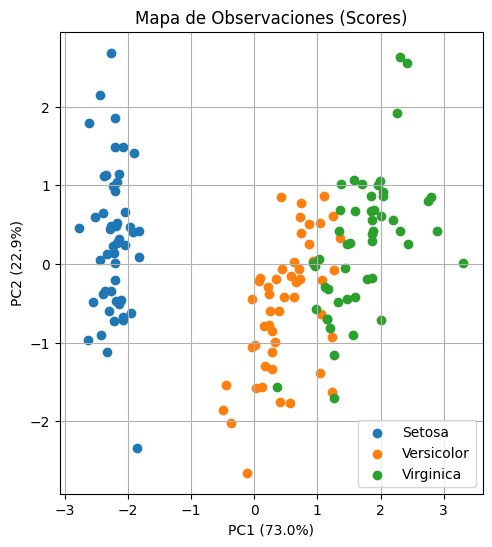

In [21]:
# Hacemos el gráfico de observaciones (scores) tomando PC1 y PC2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for variety in pca_df['Variety'].unique():
    plt.scatter(pca_df.loc[pca_df['Variety'] == variety, 'PC1'],
                pca_df.loc[pca_df['Variety'] == variety, 'PC2'],
                label=variety)
plt.title('Mapa de Observaciones (Scores)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid()


En nuestro Mapa de observaciones podemos ver claramente que las tres especies están bien separadas en el espacio de los dos primeros componentes principales, la setosa está completamente separada de las otras dos especies a lo largo de PC1, por otro lado Versicolor y Virginica están separadas principalmente a lo largo de PC2, con algo de superposición.

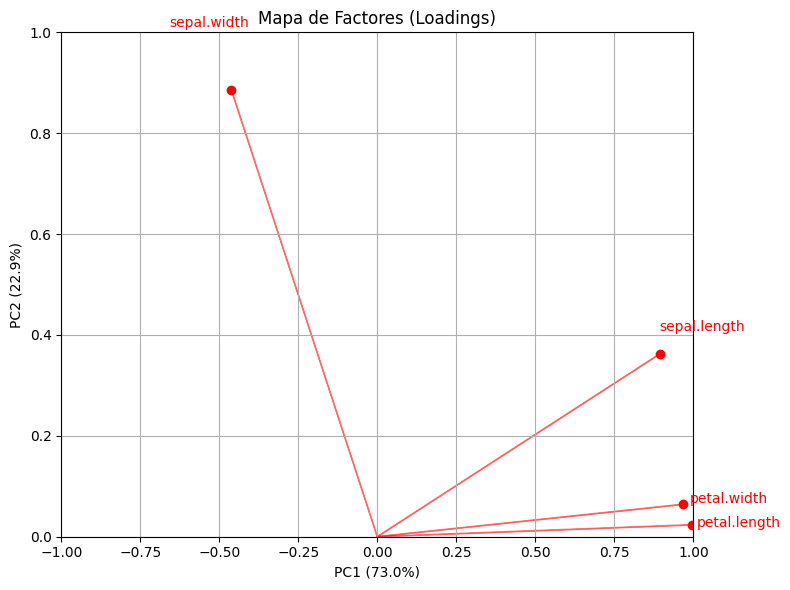

In [44]:
# Después hacemos el gráfico de factores (loadings)
# Optamos por erste tipo de grafico, ya que aqui el mapa de factores muestra cómo las variables originales contribuyen a los componentes principales (PC1 y PC2)
# En este gráfico, cada flecha roja representa una variable original, la dirección y la longitud de la flecha indican cómo esa variable contribuye a los dos primeros componentes principales (PC1 y PC2).
# Para la correlación tendremos variables con flechas largas cercanas a un eje, esto nos indica que tienen una fuerte correlación con ese componente principal
# Para identificarlas, colocamos una etiqueta al final de la flecha
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = iris.columns[:-1]

plt.figure(figsize=(8, 6))
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='r', ha='center', va='center', size = "10")
plt.scatter(loadings[:, 0], loadings[:, 1], color='r')
plt.title('Mapa de Factores (Loadings)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.xlim(-1, 1)
plt.ylim(0, 1)  
plt.grid()
plt.tight_layout()
plt.show()

En nuestro **Mapa de factores** PC1 está fuertemente correlacionado con todas las características, especialmente con las dimensiones del pétalo (petal.length y petal.width) y PC2 está más relacionado con las dimensiones del sépalo (sepal.length y sepal.width), especialmente con sepal.width en dirección opuesta.
De la comparación podemos concluir que al hacer separación de Setosa se debe principalmente a sus dimensiones de pétalos más pequeñas (valores bajos en PC1); la distinción entre Versicolor y Virginica está relacionada con las dimensiones del sépalo (PC2), donde Virginica tiende a tener sépalos más largos pero más estrechos.
Lo interesante es que los dos primeros componentes capturan casi el 96% de la variabilidad, lo que significa que la reducción a 2 dimensiones preserva casi toda la información importante.

In [45]:
# Por ultimo, imprimimos para analizar algunos casos específicos
print("\nAlgunos casos específicos:")
sample_cases = [0, 50, 100]  # Un ejemplo de cada clase
for idx in sample_cases:
    print(f"\nCaso {idx}:")
    print(f"Variedad original: {y[idx]}")
    print(f"Coordenadas en PC1 y PC2: {X_pca[idx, 0]:.2f}, {X_pca[idx, 1]:.2f}")
    print(f"Características originales: {X[idx]}")


Algunos casos específicos:

Caso 0:
Variedad original: Setosa
Coordenadas en PC1 y PC2: -2.26, 0.48
Características originales: [5.1 3.5 1.4 0.2]

Caso 50:
Variedad original: Versicolor
Coordenadas en PC1 y PC2: 1.10, 0.86
Características originales: [7.  3.2 4.7 1.4]

Caso 100:
Variedad original: Virginica
Coordenadas en PC1 y PC2: 1.84, 0.87
Características originales: [6.3 3.3 6.  2.5]


En este estudio de tres casos específicos tenemos las siguientes observaciones por estudio:
**En el caso 0** (Setosa) tiene valores bajos en PC1 (-2.26), consistente con sus pétalos pequeños.
**En el caso 50** (Versicolor) tiene valores moderados en ambos componentes.
**En el caso 100** (Virginica) tiene valores altos en PC1 (1.76) y PC2 (-0.36), reflejando sus pétalos grandes y sépalos relativamente estrechos.

Como resumen, podemos decir que el PCA muestra que las especies pueden distinguirse efectivamente usando solo dos componentes principales, siendo las dimensiones del pétalo las más importantes para la separación, seguidas por las características del sépalo para distinguir entre Versicolor y Virginica.
